# Traffic Accident Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
first_data = pd.read_csv("accidents_2005_to_2007.csv",low_memory=False)
second_data = pd.read_csv("accidents_2009_to_2011.csv",low_memory=False)
third_data = pd.read_csv("accidents_2012_to_2014.csv",low_memory=False)

In [3]:
data = pd.concat([first_data, second_data, third_data])
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [7]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


In [6]:
dataset = data.loc[:, ["Accident_Severity", "Date", "Day_of_Week", "Time", "Speed_limit", 
                        "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions",
                        "Carriageway_Hazards", "Urban_or_Rural_Area", "Year",
                        "Number_of_Vehicles", "Number_of_Casualties"]]


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Accident_Severity        1504150 non-null  int64 
 1   Date                     1504150 non-null  object
 2   Day_of_Week              1504150 non-null  int64 
 3   Time                     1504033 non-null  object
 4   Speed_limit              1504150 non-null  int64 
 5   Road_Type                1504150 non-null  object
 6   Light_Conditions         1504150 non-null  object
 7   Weather_Conditions       1504024 non-null  object
 8   Road_Surface_Conditions  1502192 non-null  object
 9   Carriageway_Hazards      1504121 non-null  object
 10  Urban_or_Rural_Area      1504150 non-null  int64 
 11  Year                     1504150 non-null  int64 
 12  Number_of_Vehicles       1504150 non-null  int64 
 13  Number_of_Casualties     1504150 non-null  int64 
dtypes: 

In [9]:
dataset.isnull().sum()
# we should handle the nulls

Accident_Severity             0
Date                          0
Day_of_Week                   0
Time                        117
Speed_limit                   0
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Carriageway_Hazards          29
Urban_or_Rural_Area           0
Year                          0
Number_of_Vehicles            0
Number_of_Casualties          0
dtype: int64

In [10]:
dataset.dropna(inplace=True)
dataset.shape

(1501937, 14)

In [11]:
# it is imfeasible to handle datetime objects as they are. So we should handle it
dataset.Date.head()

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
Name: Date, dtype: object

In [12]:
dataset["Day"] = dataset.Date.apply(lambda x: str(x).split("/")[0]).values.astype("int32")
dataset["Month"] = dataset.Date.apply(lambda x: str(x).split("/")[1]).values.astype("int32")
dataset.drop({"Date"}, axis=1, inplace=True)

In [13]:
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 
          9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

dataset.Month = dataset.Month.apply(lambda x: months[x])

In [14]:
dataset.loc[:,["Day", "Month"]].head()


,Day,Month
0,4,Jan
1,5,Jan
2,6,Jan
3,7,Jan
4,10,Jan


In [15]:
days = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 
       6:"Saturday", 7:"Sunday"}

dataset.Day_of_Week = dataset.Day_of_Week.apply(lambda x: days[x])
dataset.Day_of_Week.head()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4      Tuesday
Name: Day_of_Week, dtype: object

In [16]:
dataset.Time.head()

0    17:42
1    17:36
2    00:15
3    10:35
4    21:13
Name: Time, dtype: object

In [17]:
dataset["Hour"] = dataset.Time.apply(lambda x: str(x).split(":")[0]).values.astype("int32")
dataset.drop({"Time"}, axis=1, inplace=True)

In [18]:
dataset.Hour.head()


0    17
1    17
2     0
3    10
4    21
Name: Hour, dtype: int32

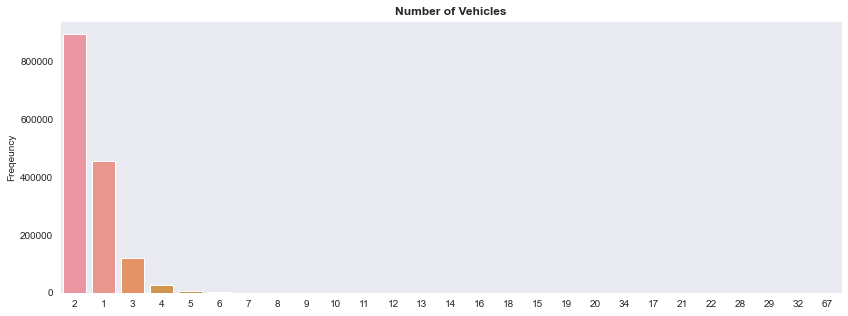

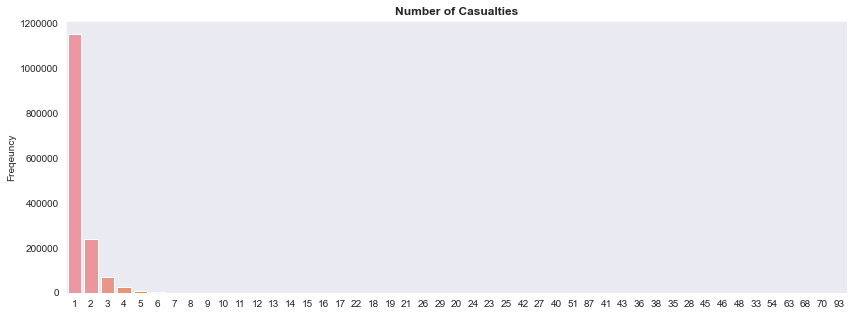

In [19]:
import seaborn as sns ## for high level visualization we use seaborn;
sns.set_style("darkgrid", {'axes.axisbelow': False})
# we are going to just visualize number of accidents and vehicles in total.

for column in ["Number_of_Vehicles", "Number_of_Casualties"]:
    var_value = dataset[column].value_counts()
    
    plt.figure(figsize=(14,5)) 
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index)    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

## What is the Difference Between Urban and Rural Area Traffic Accidents Risks?



In [5]:
datas_2_for_plotting = data.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1,inplace=False)

In [8]:
datas_2_for_plotting.describe().T

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Urban_or_Rural_Area,Year
count,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,1.353871e+00,2.009370e+03
std,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,4.783534e-01,3.013497e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.005000e+03
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.006000e+03
50%,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.010000e+03
75%,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,2.000000e+00,2.012000e+03
max,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,3.000000e+00,2.014000e+03


In [10]:
datas_2_for_plotting.dropna(inplace=True)
datas_2_for_plotting.isnull().sum()


Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Date                       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

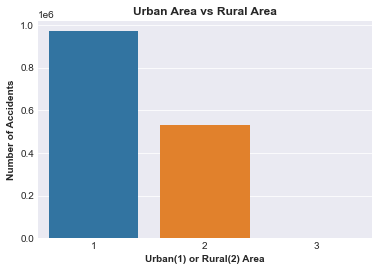

In [15]:
import seaborn as sns
datas_2_for_plotting["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=datas_2_for_plotting)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 

## What Effects Accidents Rates?

In [7]:
## we are going to see the relation in between given features and 
## accidents rates one by one.
accident_year_surface = data.groupby(["Year", "Road_Surface_Conditions"])[["Police_Force", "Accident_Severity",
                                                                                "Number_of_Casualties"]].sum()


In [19]:
accident_year_surface.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,45.0,2.009667e+03,3.015113e+00,2005.0,2007.0,2010.0,2012.0,2014.0
Police_Force,45.0,1.008250e+06,1.325807e+06,5056.0,20083.0,120618.0,1786497.0,4004792.0
Accident_Severity,45.0,9.474256e+04,1.288936e+05,369.0,1275.0,9533.0,153286.0,385353.0
Number_of_Casualties,45.0,4.510340e+04,6.079154e+04,213.0,648.0,4550.0,75604.0,181423.0


In [9]:
accident_year_surface.reset_index(inplace = True)


In [10]:
accident_year_surface


,Year,Road_Surface_Conditions,Police_Force,Accident_Severity,Number_of_Casualties
0,2005,Dry,4004792,385353,181423
1,2005,Flood (Over 3cm of water),6654,510,261
2,2005,Frost/Ice,125527,9533,4550
3,2005,Snow,43784,3209,1462
4,2005,Wet/Damp,1961360,166081,83017
5,2006,Dry,3844223,365966,172825
6,2006,Flood (Over 3cm of water),10510,739,380
7,2006,Frost/Ice,78164,5724,2758
8,2006,Snow,17769,1275,648
9,2006,Wet/Damp,1961047,162314,81515


<AxesSubplot:xlabel='Year', ylabel='Number_of_Casualties'>

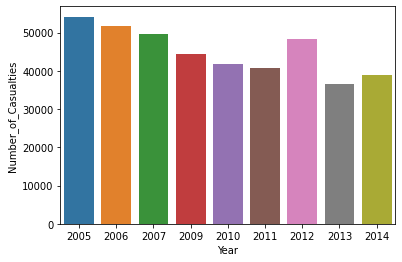

In [12]:
import seaborn as sns
sns.barplot(x = "Year", y = "Number_of_Casualties", data = accident_year_surface, ci = 0)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

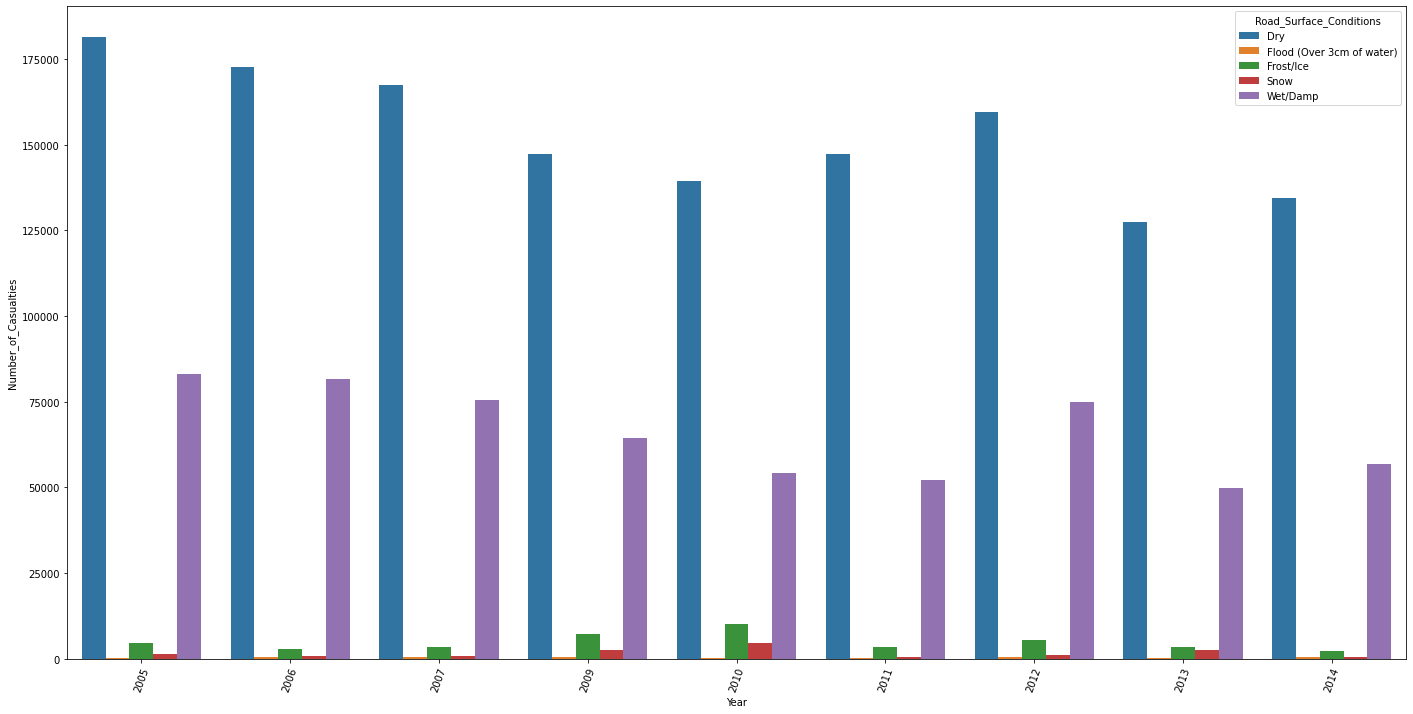

In [13]:
## relation in between road surface conditons and accident rates
plt.figure(figsize = (24, 12))
sns.barplot(x = "Year", y = "Number_of_Casualties",hue = "Road_Surface_Conditions", data = accident_year_surface, ci = 0)
plt.xticks(rotation = 70)

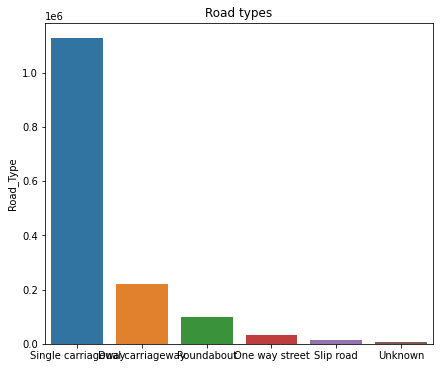

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

road = data["Road_Type"].value_counts()

sns.barplot(ax=axs, x = road.index, y = road)
axs.set_title("Road types")


plt.show()

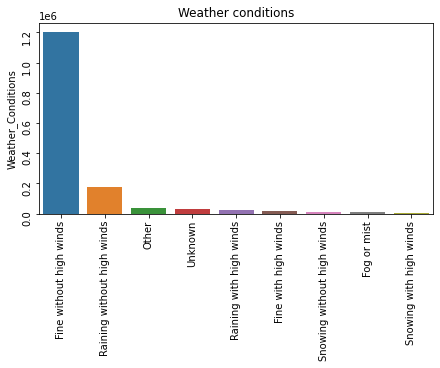

Fine without high winds       1203943
Raining without high winds     177663
Other                           33503
Unknown                         28296
Raining with high winds         20813
Fine with high winds            18355
Snowing without high winds      11301
Fog or mist                      8190
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

In [52]:
weather = data["Weather_Conditions"].value_counts()

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

sns.barplot(ax=axs, x = weather.index, y = weather)
axs.set_title("Weather conditions")
axs.tick_params(labelrotation=90)


plt.show()

weather


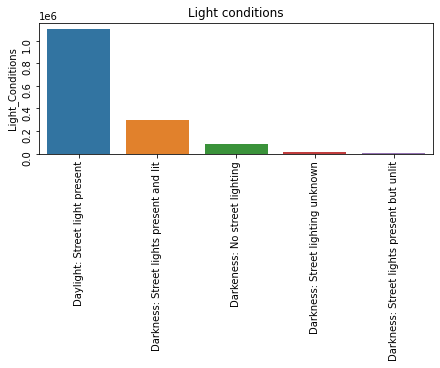

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

light = data["Light_Conditions"].value_counts()

sns.barplot(ax=axs, x = light.index, y = light)
axs.set_title("Light conditions")
axs.tick_params(labelrotation=90)

Text(0.5, 1.0, 'Speed limit')

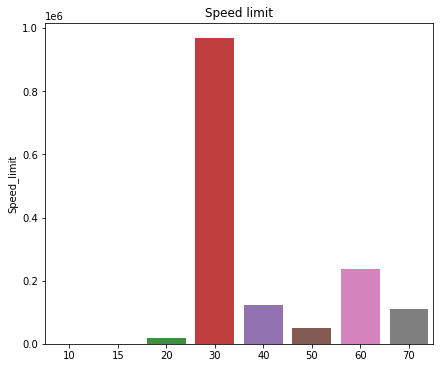

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

speed = data["Speed_limit"].value_counts()
sns.barplot(ax=axs, x = speed.index, y = speed)
axs.set_title("Speed limit")

## Can we predict the accident rates

In [9]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [16]:
x = data.sample(frac=.1)
# x = accident_data.head(1)
y = x[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Weather_Conditions','Light_Conditions',
       'Road_Surface_Conditions','Speed_limit']]
y['Weather_Conditions'] = y['Weather_Conditions'].astype('category')
y['Light_Conditions'] = y['Light_Conditions'].astype('category')
y['Road_Surface_Conditions'] = y['Road_Surface_Conditions'].astype('category')
y['Speed_limit'] = y['Speed_limit'].astype('category')

print(y.size)
"""
y['Weather_Conditions_Cat'] = y['Weather_Conditions'].cat.codes
y['Light_Conditions_Cat'] = y['Light_Conditions'].cat.codes
y['Road_Surface_Conditions_Cat'] = y['Road_Surface_Conditions'].cat.codes
y['Speed_limit_Cat'] = y['Speed_limit'].cat.codes
"""

y.head()

1052905


c:\users\taha yunus\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\taha yunus\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\taha yunus\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Weather_Conditions,Light_Conditions,Road_Surface_Conditions,Speed_limit
54886,3,6,2,Fine without high winds,Daylight: Street light present,Dry,30
246922,3,2,2,Raining without high winds,Daylight: Street light present,Wet/Damp,30
204092,3,2,1,Fine without high winds,Daylight: Street light present,Dry,50
102684,3,1,1,Fine without high winds,Darkeness: No street lighting,Wet/Damp,60
529798,3,2,1,Fine without high winds,Daylight: Street light present,Dry,70


In [17]:
%matplotlib inline

import seaborn as sb
#sb.pairplot(y)
#y.index.is_unique
#y.index.duplicated()
k = y.loc[~y.index.duplicated(), :]


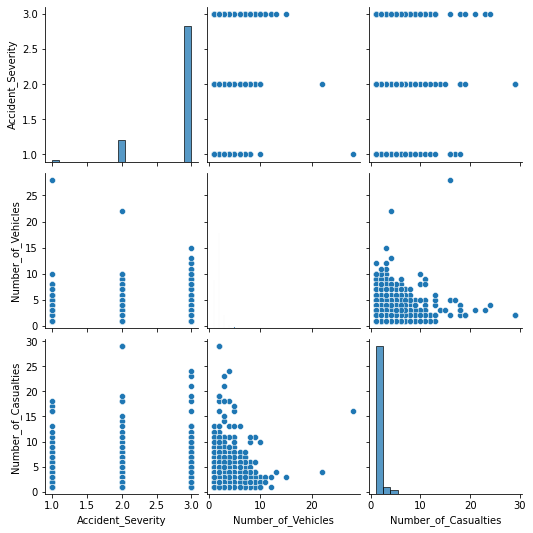

In [20]:
sb.pairplot(k)


It can be apparently seen that there are many corollations in between casuaties, # of vehicles and accident severity.
So based on these features Accident rates can be predicted.